## 5) Try to implement word-embedding using code given in listing (6.7) and shared with me the embedding array as well as the word dictionary.

# Importing Dataset

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Word Dictionary 

In [16]:
import itertools
import random

word_index = imdb.get_word_index()

for i in range(10):
    word_index_sliced = dict(itertools.islice(word_index.items(), random.randint(1,1000)))
    
print("Some random Words:",word_index_sliced,end='')

Some random Words: {'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028, 'zaniacs': 52130, '275': 34706, 'consenting': 276

# Training Model

In [17]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Embedding(10000, 8, input_length=maxlen))
embedding_weights_after_fitting_model_1 = model1.get_weights() 

model1.add(Flatten())

model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
whole_model_1_weights = model1.get_weights() 

model1.summary()

history = model1.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 269us/sample - loss: 0.6725 - acc: 0.6176 - val_loss: 0.6264 - val_acc: 0.6914
Epoch 2/10
20000/20000 [==============================] - 1s 70us/sample - loss: 0.5470 - acc: 0.7477 - val_loss: 0.5272 - val_acc: 0.7318
Epoch 3/10
20000/20000 [==============================

## Plotting Results

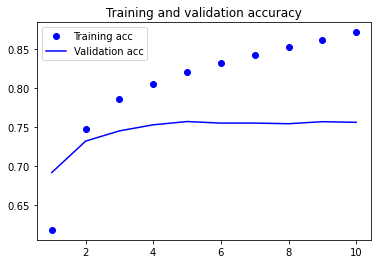

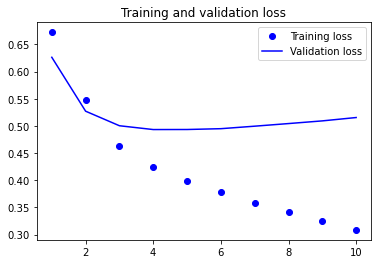

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Shape of Embedding Weights

In [19]:
import numpy as np

In [20]:
print(np.array(whole_model_1_weights[0]).shape)
print(np.array(embedding_weights_after_fitting_model_1[0]).shape)

(10000, 8)
(10000, 8)


# Embedding Array After Training 

In [21]:
print(embedding_weights_after_fitting_model_1)

[array([[-0.04902946, -0.02606782, -0.02664423, ...,  0.00104269,
        -0.02064034,  0.02689988],
       [-0.02429459,  0.02384556, -0.02075335, ..., -0.04462851,
         0.01035639,  0.02386241],
       [-0.00119688, -0.016831  , -0.04883105, ..., -0.03872087,
        -0.01841348, -0.0154961 ],
       ...,
       [-0.0368007 , -0.00056528, -0.02004825, ...,  0.00032288,
         0.01036693,  0.03891456],
       [ 0.00841498,  0.03711076, -0.04661585, ...,  0.00991299,
         0.03539034,  0.02752126],
       [-0.01578181,  0.00880634, -0.00316219, ...,  0.04190559,
         0.03676066, -0.02508316]], dtype=float32)]


# Whole Model Weights Including Classification Weights

In [22]:
whole_model_1_weights

[array([[-0.04902946, -0.02606782, -0.02664423, ...,  0.00104269,
         -0.02064034,  0.02689988],
        [-0.02429459,  0.02384556, -0.02075335, ..., -0.04462851,
          0.01035639,  0.02386241],
        [-0.00119688, -0.016831  , -0.04883105, ..., -0.03872087,
         -0.01841348, -0.0154961 ],
        ...,
        [-0.0368007 , -0.00056528, -0.02004825, ...,  0.00032288,
          0.01036693,  0.03891456],
        [ 0.00841498,  0.03711076, -0.04661585, ...,  0.00991299,
          0.03539034,  0.02752126],
        [-0.01578181,  0.00880634, -0.00316219, ...,  0.04190559,
          0.03676066, -0.02508316]], dtype=float32), array([[ 0.01377   ],
        [ 0.08403629],
        [ 0.18121988],
        [ 0.1000554 ],
        [-0.13145523],
        [ 0.13210538],
        [-0.15355726],
        [ 0.1554159 ],
        [ 0.04624858],
        [-0.18179138],
        [ 0.06474945],
        [-0.07624899],
        [ 0.04074094],
        [-0.17549908],
        [-0.13058153],
        [ 0.18

## Model Testing 

In [23]:
test_loss_1, test_acc_1 = model1.evaluate(x_test,y_test,verbose=2)

25000/1 - 1s - loss: 0.4296 - acc: 0.7604


## 6) From 6.8 code pre-trained word-embeddings

## Downloading the IMDB Data as Raw Text and  Processing the labels

In [11]:
import os
imdb_dir = '/Users/Muzammil/Downloads/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

## Tokenizing the text of the raw IMDB data

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


## Parsing the GloVe word-embeddings file

In [13]:
import os
import numpy as np

glove_dir = '/Users/Muzammil/Downloads/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [14]:
import itertools

for i in range(2):
    dict_1 = dict(itertools.islice(embeddings_index.items(), i))
print("Example text 1,")    
print(dict_1,end='')

Example text 1,
{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624

## Preparing the GloVe word-embeddings matrix

In [22]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [23]:
embedding_matrix.shape

(10000, 100)

## Model Definition

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model2.add(Flatten())

model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## Loading pretrained word embeddings into the Embedding layer

In [25]:
model2.layers[0].set_weights([embedding_matrix])
model2.layers[0].trainable = False

## Compiling and Training Model

In [26]:
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model2.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

model2.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 4s 18ms/sample - loss: 2.5113 - acc: 0.5250 - val_loss: 0.7084 - val_acc: 0.5094
Epoch 2/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.9039 - acc: 0.6200 - val_loss: 1.4463 - val_acc: 0.4954
Epoch 3/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.5516 - acc: 0.7850 - val_loss: 1.3683 - val_acc: 0.4955
Epoch 4/10
200/200 [==============================] - 2s 11ms/sample - loss: 0.3333 - acc: 0.8900 - val_loss: 0.8715 - val_acc: 0.5240
Epoch 5/10
200/200 [==============================] - 2s 10ms/sample - loss: 0.4532 - acc: 0.8550 - val_loss: 0.9819 - val_acc: 0.5136
Epoch 6/10
200/200 [==============================] - 3s 15ms/sample - loss: 0.1367 - acc: 0.9700 - val_loss: 0.7689 - val_acc: 0.5402
Epoch 7/10
200/200 [==============================] - 4s 22ms/sample - loss: 0.1155 - acc: 0.9700 - val_loss: 0.7638 - val_acc: 0.5432
Epoch 8/1

## Plotting the results

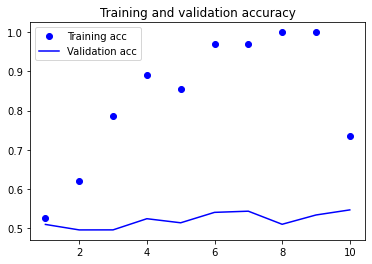

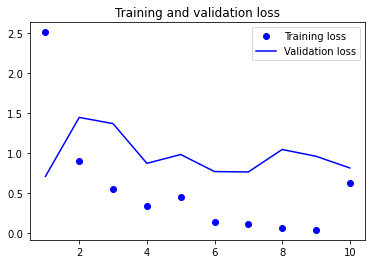

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Tokenizing the data of the test set

In [19]:
import os
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

## Testing Model

In [28]:
test_loss_2, test_acc_2 = model2.evaluate(x_test,y_test,verbose=2)

25000/1 - 4s - loss: 0.5211 - acc: 0.5480


## 7) Apply RNN to the given text (listing 6.21) and provide output

## Importing RNN from Keras

In [29]:
from tensorflow.keras.layers import SimpleRNN

## Preparing IMDB data

In [30]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Training the model with Embedding and SimpleRNN layers

In [31]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding

model3 = Sequential()
model3.add(Embedding(max_features, 32))
model3.add(SimpleRNN(32))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model3.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.5452 - acc: 0.7290 - val_loss: 0.4217 - val_acc: 0.8132
Epoch 2/10
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.3483 - acc: 0.8569 - val_loss: 0.4066 - val_acc: 0.8160
Epoch 3/10
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.2800 - acc: 0.8917 - val_loss: 0.3554 - val_acc: 0.8464
Epoch 4/10
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.2283 - acc: 0.9138 - val_loss: 0.4122 - val_acc: 0.8218
Epoch 5/10
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.1758 - acc: 0.9351 - val_loss: 0.3980 - val_acc: 0.8412
Epoch 6/10
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.1357 - acc: 0.9531 - val_loss: 0.4292 - val_acc: 0.8464
Epoch 7/10
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.1005 - acc: 0.9656 - val_loss: 0.4

## Plotting Results

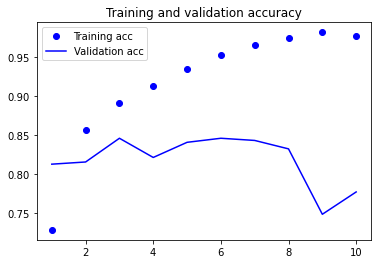

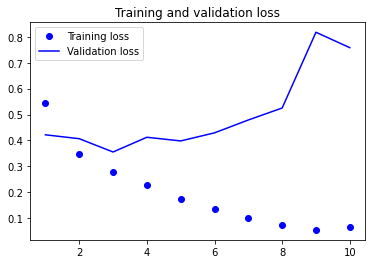

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model Testing 

In [33]:
test_loss_3, test_acc_3 = model3.evaluate(input_test,y_test,verbose=2)

25000/1 - 33s - loss: 0.8274 - acc: 0.7729


## 8) Match the results of RNN (step 7) with the step 5 and also with step 6. Share the output of the analysis.

## Test Results of All Models

In [33]:
print(f"First Model : Accuracy = {test_acc_1*100} , Loss = {test_loss_1}")
print("Here we got test accuracy of 76% and 0.50 Loss with simple Word Embedding.\n")
print(f"Second Model : Accuracy = {test_acc_2*100} , Loss = {test_loss_2}")
print("Here we got test accuracy of 54% and 0.80 loss with Pretrained Word Embedding.\n")
print(f"Third Model : Accuracy = {test_acc_3*100} , Loss = {test_loss_3}")
print("Here we got test accuracy of 77% and 0.79 Loss with Simple-RNN.")

First Model : Accuracy = 76.04399919509888 , Loss = 0.5063726656627655
Here we got test accuracy of 76% and 0.50 Loss with simple Word Embedding.

Second Model : Accuracy = 54.79999780654907 , Loss = 80.67536211872101
Here we got test accuracy of 54% and 0.80 loss with Pretrained Word Embedding.

Third Model : Accuracy = 77.28800177574158 , Loss = 79.4188487663269
Here we got test accuracy of 77% and 0.79 Loss with Simple-RNN.
